# NEW YORK TAXI DATA ANALYSIS

## 1. CLEANING THE DATA

I converted the train.csv to feather file for faster processing using pandas.DataFrama.to_feather.
The first step involves cleaning the data.

In [ ]:
import pandas as pd
import seaborn as sns
df=pd.read_feather("/Users/rushil/Desktop/Fall 18/DSF/Data Sets/Final Files/Final DataSets/train.feather",nthreads=10)


### Tasks:
#### REMOVING OUTLIERS AND NAN VALUES:
Outlier rows will be removed using Interquartile Ranges Method. <br>
1. Remove values with longitudinal range out of New York State(http://www.netstate.com/states/geography/ny_geography.htm) <br>
2. Remove values with high and lowfares.(Fares greater than ksigma* mean, k=3.5 )<br>
3. Remove values with passenger count more than maximum capacity.<br>
4. Remove negative values in any column.<br>
5. Removing distances less than 3 standard devaitions of the mean.<br>

In [ ]:
#describing the data to see the range of datavalues
df.describe()

In [ ]:
dfc=df
dfc.dropna() # Drop NaN Values

dfc =df[(df!=0.00).all(1)] #Zero Values
dfc = dfc[df.passenger_count <= 6] #Passenger count cannot exceed 6
dfc = dfc[df.passenger_count > 0]
dfc = dfc[df.fare_amount > 2]
dfc = dfc[dfc.fare_amount <=95 ] #Outlier Fare Amount

#Latitude and Longitude Ranges for New York
dfc = dfc[(df.pickup_longitude)<=-71]
dfc = dfc[(df.pickup_longitude)>=-79]
dfc = dfc[(df.pickup_latitude)<=45.1]
dfc = dfc[(df.pickup_latitude)>=40 ]
dfc = dfc[(df.dropoff_longitude)<=-71]
dfc = dfc[(df.dropoff_longitude)>=-79]
dfc = dfc[(df.dropoff_latitude)<=45.1]
dfc = dfc[(df.dropoff_latitude)>=40]
dfc.describe()

## 2. CALCULATING PEARSON'S COEFFICIENT
1. Calculate Euclidian Distance between the pickup and dropoff points using haversine's formula
2. Calculate time as a float. Hour.Minutes
3. Compute Correlations Between Distance, Time and Fares and display the correlation matrix.

In [ ]:

import numpy as np
import warnings
warnings.filterwarnings('ignore')
"""
Computing Eucledian Distances, Fare and Times and Storing it in a Feather File: corr_data.feather
"""

def calcEucledian_Distance(lat1,lon1,lat2,lon2):
    """
    This function calculates the Eucledian Distance from given latitudes and longitudes of two points.
    We have used the Haversine's Formulae to calculate the distance between these two points on a sphere of
    radius equals earth's radius (R=3961 miles)
    Returns distance in miles.
    """
    R=3961
    dlon=lon2-lon1
    dlat=lat2-lat1
    a = (np.sin(np.radians(dlat/2)))**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * (np.sin(np.radians(dlon/2)))**2
    c = 2 * np.arcsin(np.sqrt(a))
    d = R * c
    return d

def calcTime(dt_series):
    """
    Calculates the time of the day when the cab started from the pickup points. Takes in a string and converts it into a datetime format.
    Then extract the time from it and convert it into float value.
    Returns time in hours.
    """
    def get_split_date(strdt):
        """
        Splits the datetime string into time and date and removes the extra parts.
        Returns the space seperated string
        
        """
        split_date = strdt.split()
        str_time = split_date[0]+' '+split_date[1] 
        #print (str_date)
        return str_time

    t = pd.to_datetime(dt_series.apply(lambda x: get_split_date(x)),format = '%Y %m %d %H:%M:%S')
    return t.dt.hour + t.dt.minute/60 

"""
Converting string latlongs into float for passing into the function.
"""

dfc['pickup_latitude'] = dfc.loc[:,'pickup_latitude'].astype(float)
dfc['pickup_longitude'] = dfc.loc[:,'pickup_longitude'].astype(float)
dfc['dropoff_latitude'] = dfc.loc[:,'dropoff_latitude'].astype(float)
dfc['dropoff_longitude'] = dfc.loc[:,'dropoff_longitude'].astype(float)

dfc['dist'] = calcEucledian_Distance(dfc.loc[:,'pickup_latitude'],dfc.loc[:,'pickup_longitude'] , df.loc[:,'dropoff_latitude'], df.loc[:,'dropoff_longitude'])
dfc['time'] = calcTime(dfc.loc[:,'pickup_datetime'])







### -> Corelation Matrix

In [40]:
corr_df[['fare_amount','dist','time']].corr()

,fare_amount,dist,time
fare_amount,1.000000,0.813205,-0.017979
dist,0.813205,1.000000,-0.027657
time,-0.017979,-0.027657,1.000000


### Analyzing the correlation matrix:
1. Distance and Fare are highly positively correlated, indicating that fare increases as a function of distance.
2. Time of Pickup & Fare and Time of Pickup & Distance have small negative correlation indicating that these factors do not influence each other to a high degree.
3. The <b >highest corelation is between distance and fare which is around 81%</b>

In [100]:
"""
Creating Feather File for processing Corerelation Data faster further
"""

corr_df=corr_df.reset_index(drop=True)
corr_df.to_feather("/Users/rushil/Desktop/Fall 18/DSF/Data Sets/Final Files/Final DataSets/corr_data_clean.feather")

# 3. Plots Visualizing the correlation matrix


### Distance vs Fare Amount Graph

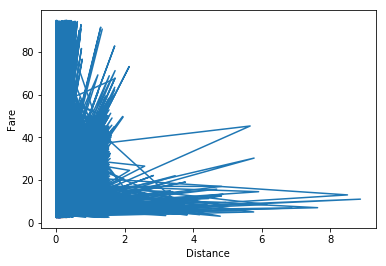

"\nplt.xlabel('Distance')\nplt.ylabel('Time')\nplt.plot(d,t)\nplt.show()\n\nplt.xlabel('Time')\nplt.ylabel('Fare')\nplt.plot(t,f)\nplt.show()\n\n"

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['agg.path.chunksize'] = 10000

d=corr_df.loc[:10000000,'Manhattan_Dist']
f=corr_df.loc[:10000000,'fare_amount']
t=corr_df.loc[:10000000,'time']

plt.xlabel('Distance')
plt.ylabel('Fare')
plt.plot(d,f)
plt.show()




In [3]:
import pandas as pd
corr_df=pd.read_feather("/Users/rushil/Desktop/Fall 18/DSF/Data Sets/Final Files/Final DataSets/corr_data_optimized_a3.feather")

/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


### Pair Plots between Distance, Fare and Time of Day

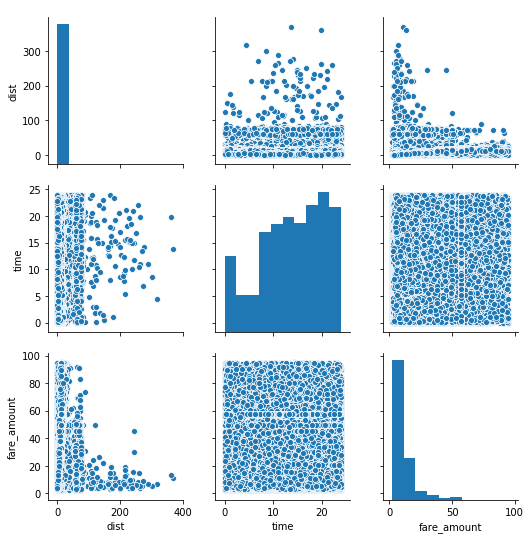

In [7]:
import seaborn as sns
sns.pairplot(corr_df.loc[:10000000,['dist','time','fare_amount']])

# 4. Creating an exciting plot of your own:

I created several plots:
1. Heat Map and hex maps between correlation data 
2. Hourly fare amount distribution in bar graph.
3. Plot between pickup location (Borough) and fare amount.

[1168810, 1769971, 1356526, 967742, 757785, 467920, 721036, 1503808, 2261296, 2446310, 2461763, 2364631, 2632459, 2543368, 2679418, 2623643, 2397298, 2237061, 3027361, 3262300, 3288574, 3022476, 3070340, 2776070]


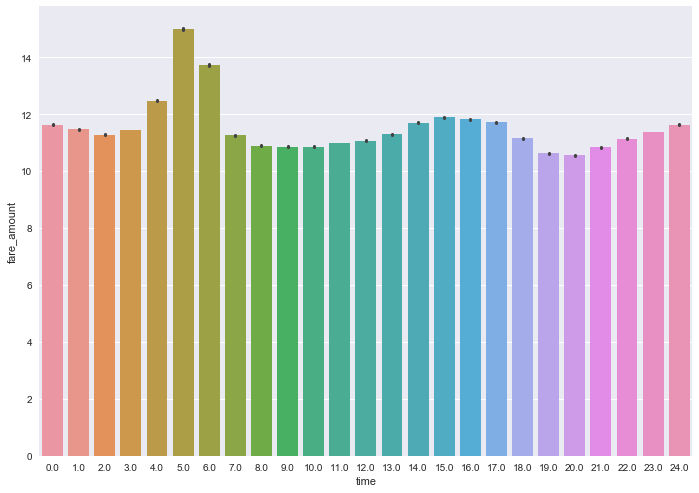

In [24]:
from matplotlib.ticker import MaxNLocator
import pandas as pd
import seaborn as sns 
import matplotlib as plt

#HOURLY TRAFFIC DISTRIBUTION
dfplot=pd.DataFrame()
dfplot[['time']]=round (corr_df.loc[:,['time']])
dfplot[['fare_amount']]=corr_df.loc[:,['fare_amount']]

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="time", y="fare_amount", data=dfplot)





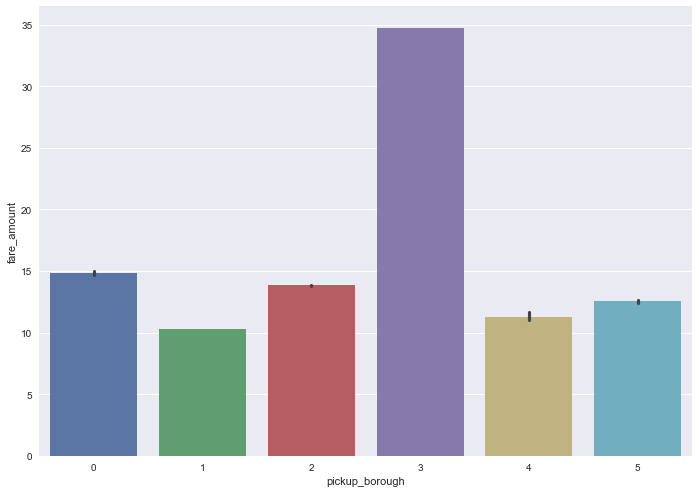

In [35]:
#LOCATION (PICKUP BOROUGHS VS FARE AMOUNT)
#dfplot=pd.DataFrame()
#dfplot[['pickup_borough']]=corr_df.loc[:,['pickup_borough']]
sns.set(rc={'figure.figsize':(11.7,8.27)})
xticks
ax = sns.barplot(x="pickup_borough", y="fare_amount", data=dfplot) 


#### Legend
1: Manhattan
2: Brooklyn
3: Queens
4: Bronx Island
5: Staten Island

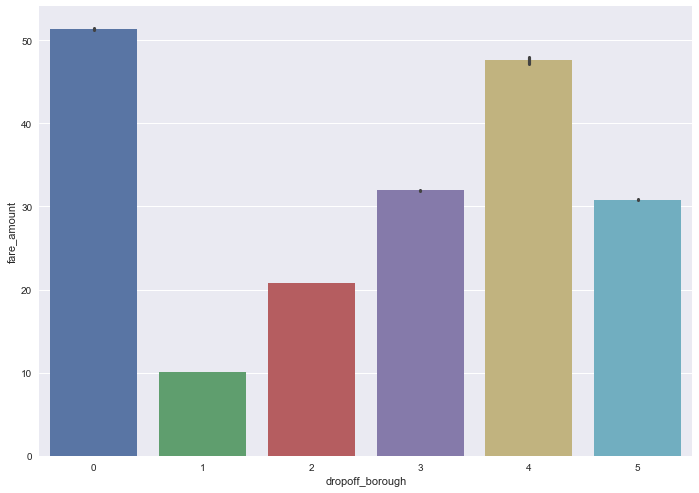

In [55]:
dfplot[['dropoff_borough']]=corr_df.loc[:,['dropoff_borough']]
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="dropoff_borough", y="fare_amount", data=dfplot) 

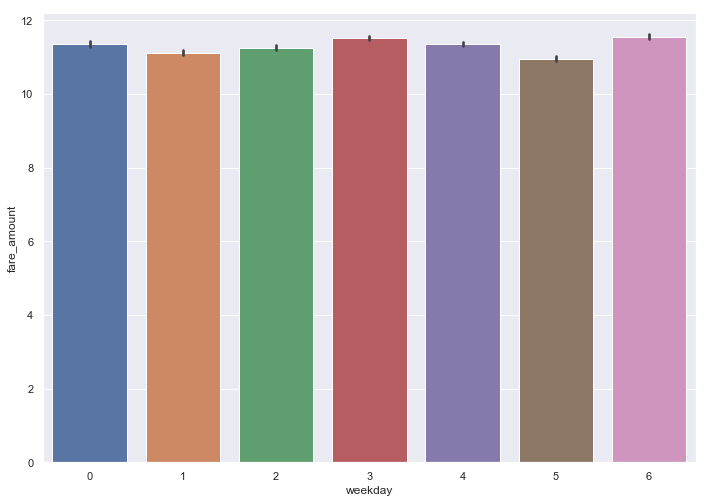

In [8]:
import seaborn as sns
dfplot=pd.DataFrame()
dfplot[['fare_amount']]=corr_df.loc[:,['fare_amount']]
dfplot[['weekday']]=corr_df.loc[:,['weekday']]
dfplot=dfplot.sample(frac=0.01)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="weekday", y="fare_amount", data=dfplot) 

# 5. Generating additional features:

1. Weekday of travel
2. Months of the year
3. Manhattan Distances from Differences in latitude and longitudes
4. Borughs: Classifying <b> pickup and dropoff location in boroughs </b>of new york.
5. Distances of pickup and dropoff points from three airports in New York, JFK, Newark and La Guardia

In [ ]:
corr_df['weekday'] = pd.to_datetime(df.pickup_datetime, format="%Y-%m-%d %H:%M:%S UTC").dt.weekday

In [ ]:
def calcMonths(dt_series):
    """
    Calculates the time of the day when the cab started from the pickup points. Takes in a string and converts it into a datetime format.
    Then extract the time from it and convert it into float value.
    Returns time in hours.
    """
    def get_split_date(strdt):
        """
        Splits the datetime string into time and date and removes the extra parts.
        Returns the space seperated string
        
        """
        split_date = strdt.split()
        str_time = split_date[0]+' '+split_date[1] 
        #print (str_date)
        return str_time

    t = pd.to_datetime(dt_series.apply(lambda x: get_split_date(x)),format = '%Y %m %d %H:%M:%S')
    return t.dt.month

corr_df['month'] = calcMonths(df.loc[:,'pickup_datetime'])
corr_df['pickup_lat_diff']=df['pickup_latitude']-df['dropoff_latitude']
corr_df['pickup_lon_df']=df['pickup_longitude']-df['dropoff_longitude']

corr_df=corr_df.reset_index(drop=True)

In [ ]:
def calcManhDist(plat,plon,dlat,dlon):
    """
    Returns ManhattanDist Between two points.
    """
    return np.abs(plat-dlat)+np.abs(dlat-dlon)

    
corr_df['Manhattan_Dist'] = calcManhDist(df.loc[:,'pickup_latitude'],df.loc[:,'pickup_longitude'] , df.loc[:,'dropoff_latitude'], df.loc[:,'dropoff_longitude'])

In [ ]:
def calBoroughs(row):
    #Broroughs are assigned numerical values as follows: Manhattan: 0, Brooklyn: 1, Queens: 3
    #Staten Island: 4, The Bronx: 5, Any other location 0
    """
* Manhattan: -74.019341,40.69978,-73.910439,40.877621
* Brooklyn: -74.055847,40.54985,-73.833565,40.739403
* Queens: -74.044418,40.49321,-73.70018,40.811951
* Staten : -74.2583,40.4921,-74.0448,40.6517
* Bronx : -73.933655,40.785332,-73.748062,40.91618
    """
    if row['pickup_longitude'] >= -74.019341 & row['pickup_longitude']<= -73.910439 & row['pickup_latitude']>=40.69978 & row['pickup_latitude']<=40.877621:
        return 1
    elif row['pickup_longitude'] >= -74.055847 & row['pickup_longitude']<= -73.833565 & row['pickup_latitude']>=40.54985 & row['pickup_latitude']<=40.739403:
        return 2
    elif row['pickup_longitude'] >= -74.044418 & row['pickup_longitude']<= -73.70018 & row['pickup_latitude']>=40.49321 & row['pickup_latitude']<=40.811951:
        return 3
    elif row['pickup_longitude'] >= -74.2583 & row['pickup_longitude']<= -74.0448 & row['pickup_latitude']>=40.4921 & row['pickup_latitude']<=40.6517:
        return 4
    elif row['pickup_longitude'] >= -73.933655 & row['pickup_longitude']<= -73.748062 & row['pickup_latitude']>=40.785332 & row['pickup_latitude']<=40.91618:
        return 5
    else:
        return 0
    
corr_df['pickup_borough']=dfgiven.apply(calBoroughs, axis=1)

def calBoroughs(row):
    #Broroughs are assigned numerical values as follows: Manhattan: 0, Brooklyn: 1, Queens: 3
    #Staten Island: 4, The Bronx: 5, Any other location 0
    """
* Manhattan: -74.019341,40.69978,-73.910439,40.877621
* Brooklyn: -74.055847,40.54985,-73.833565,40.739403
* Queens: -74.044418,40.49321,-73.70018,40.811951
* Staten : -74.2583,40.4921,-74.0448,40.6517
* Bronx : -73.933655,40.785332,-73.748062,40.91618
    """
    if row['dropoff_longitude'] >= -74.019341 and row['dropoff_longitude']<= -73.910439 and row['dropoff_latitude']>=40.69978 and row['dropoff_latitude']<=40.877621:
        return 1
    elif row['dropoff_longitude'] >= -74.055847 and row['dropoff_longitude']<= -73.833565 and row['dropoff_latitude']>=40.54985 and row['dropoff_latitude']<=40.739403:
        return 2
    elif row['dropoff_longitude'] >= -74.044418 and row['dropoff_longitude']<= -73.70018 and row['dropoff_latitude']>=40.49321 and row['dropoff_latitude']<=40.811951:
        return 3
    elif row['dropoff_longitude'] >= -74.2583 and row['dropoff_longitude']<= -74.0448 and row['dropoff_latitude']>=40.4921 and row['dropoff_latitude']<=40.6517:
        return 4
    elif row['dropoff_longitude'] >= -73.933655 and row['dropoff_longitude']<= -73.748062 and row['dropoff_latitude']>=40.785332 and row['dropoff_latitude']<=40.91618:
        return 5
    else:
        return 0
    
corr_df['dropoff_borough']=df.apply(calBoroughs, axis=1


# 6. Set up a simple linear regression model to predict taxi fare.


## Converting test.csv to test.feather with our generated features in training set.

In [ ]:
import numpy as np
#Creating Test Data Set Features
dftest =  pd.read_csv("/Users/rushil/Desktop/Fall 18/DSF/Data Sets/Final Files/test.csv")
def calcEucledian_Distance(lat1,lon1,lat2,lon2):
    """
    This function calculates the Eucledian Distance from given latitudes and longitudes of two points.
    We have used the Haversine's Formulae to calculate the distance between these two points on a sphere of
    radius equals earth's radius (R=3961 miles)
    Returns distance in miles.
    """
    R=3961
    dlon=lon2-lon1
    dlat=lat2-lat1
    a = (np.sin(np.radians(dlat/2)))**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * (np.sin(np.radians(dlon/2)))**2
    c = 2 * np.arcsin(np.sqrt(a))
    d = R * c
    return d

def calcWeekday(dt_series):
    """
    Calculates the time of the day when the cab started from the pickup points. Takes in a string and converts it into a datetime format.
    Then extract the time from it and convert it into float value.
    Returns time in hours.
    """
    def get_split_date(strdt):
        """
        Splits the datetime string into time and date and removes the extra parts.
        Returns the space seperated string
        
        """
        split_date = strdt.split()
        str_time = split_date[0]+' '+split_date[1] 
        #print (str_date)
        return str_time
    
def calcMand(plat,plon,dlat,dlon):
    """
    Returns ManhattanDist Between two points.
    """
    return np.abs(plat-dlat)+np.abs(dlat-dlon)

def calcTime(dt_series):
    """
    Calculates the time of the day when the cab started from the pickup points. Takes in a string and converts it into a datetime format.
    Then extract the time from it and convert it into float value.
    Returns time in hours.
    """
    def get_split_date(strdt):
        """
        Splits the datetime string into time and date and removes the extra parts.
        Returns the space seperated string
        
        """
        split_date = strdt.split()
        str_time = split_date[0]+' '+split_date[1] 
        #print (str_date)
        return str_time

    t = pd.to_datetime(dt_series.apply(lambda x: get_split_date(x)),format = '%Y %m %d %H:%M:%S')
    return t.dt.hour + t.dt.minute/60 

def calcMonths(dt_series):
    """
    Calculates the time of the day when the cab started from the pickup points. Takes in a string and converts it into a datetime format.
    Then extract the time from it and convert it into float value.
    Returns time in hours.
    """
    def get_split_date(strdt):
        """
        Splits the datetime string into time and date and removes the extra parts.
        Returns the space seperated string
        
        """
        split_date = strdt.split()
        str_time = split_date[0]+' '+split_date[1] 
        #print (str_date)
        return str_time

    t = pd.to_datetime(dt_series.apply(lambda x: get_split_date(x)),format = '%Y %m %d %H:%M:%S')
    return t.dt.month

dftest['month'] = calcMonths(dftest.loc[:,'pickup_datetime'])

"""
Converting string latlongs into float for passing into the function.
Airpoirt Distances
"""
df_test['pick_ewr_dist']=abs(df_test['pickup_latitude']-40.6895)+abs(df_test['pickup_longitude']+74.1745)
df_test['pick_jfk_dist']=abs(df_test['pickup_latitude']-40.6413)+abs(df_test['pickup_longitude']+73.7781)
df_test['pick_lga_dist']=abs(df_test['pickup_latitude']-40.7769)+abs(df_test['pickup_longitude']+73.8740)
df_test['drop_ewr_dist']=abs(df_test['dropoff_latitude']-40.6895)+abs(df_test['dropoff_longitude']+74.1745)
df_test['drop_jfk_dist']=abs(df_test['dropoff_latitude']-40.6413)+abs(df_test['dropoff_longitude']+73.7781)
df_test['drop_lga_dist']=abs(df_test['dropoff_latitude']-40.7769)+abs(df_test['dropoff_longitude']+73.8740)


dftest['pickup_latitude'] = dftest.loc[:,'pickup_latitude'].astype(float)
dftest['pickup_longitude'] = dftest.loc[:,'pickup_longitude'].astype(float)
dftest['dropoff_latitude'] = dftest.loc[:,'dropoff_latitude'].astype(float)
dftest['dropoff_longitude'] = dftest.loc[:,'dropoff_longitude'].astype(float)

dftest['dist'] = calcEucledian_Distance(dftest.loc[:,'pickup_latitude'],dftest.loc[:,'pickup_longitude'] , dftest.loc[:,'dropoff_latitude'], dftest.loc[:,'dropoff_longitude'])
dftest['time'] = calcTime(dftest.loc[:,'pickup_datetime'])

dftest.to_csv("/Users/rushil/Desktop/Fall 18/DSF/Data Sets/Final Files/Final DataSets/test_new.csv")
print (dftest.head())

## 6.1 Linear Regression with Distance and Time

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
# Load the clean train and test taxi datasets

dftrain = corr_df
dftrain['dist']=corr_df.loc[:,['dist']]
dftrain['time']=corr_df.loc[:,['time']]
x_train = dftrain.loc[:,['dist','time']]
y_train = dftrain.loc[:,['fare_amount']]
x_test = df_test.loc[:,['dist','time']]

regr = linear_model.LinearRegression()
#Fitting the data
model = regr.fit(x_train, y_train)
#Predicting the fares.
pred=model.predict(x_test)
print (regr.coef_)
#print (y_test.head(15))
df1=pd.DataFrame()
df1=df_test[['key']]
df1['fare_amount']=pred
df1.to_csv('/Users/rushil/Desktop/Fall 18/DSF/Data Sets/Final Files/Final DataSets/linear_reg_out_kaggle_new.csv',index=False)



### Linear Regression Coefficient are:<br>
* Dist: 3.01788166 <br>
* Time 0.00421022
### KAGGLE RMSE: 5.56205

## 6.2 Linear Regression with additional features
This time I used linear regression with other factors like manhattan distance, day of week, month of the week and pickup latitudes and longitudes.
The RMSE  considerably improved with these new features

In [33]:
dftrain=corr_df

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
# Load the clean train and test taxi datasets


dftrain['pickup_latitude']=df.loc[:,['pickup_latitude']]
dftrain['pickup_longitude']=df.loc[:,['pickup_longitude']]
dftrain['dropoff_longitude']=df.loc[:,['dropoff_longitude']]
dftrain['dropoff_latitude']=df.loc[:,['dropoff_latitude']]

dftrain['pick_ewr_dist']=dfairp.loc[:,['pick_ewr_dist']]
dftrain['pick_jfk_dist']=dfairp.loc[:,['pick_jfk_dist']]
dftrain['pick_lga_dist']=dfairp.loc[:,['pick_lga_dist']]
"""
dftrain['drop_ewr_dist']=dfairp.loc[:,['drop_ewr_dist']]
dftrain['drop_jfk_dist']=dfairp.loc[:,['drop_jfk_dist']]
dftrain['drop_lga_dist']=dfairp.loc[:,['drop_lga_dist']]
"""

"\ndftrain['drop_ewr_dist']=dfairp.loc[:,['drop_ewr_dist']]\ndftrain['drop_jfk_dist']=dfairp.loc[:,['drop_jfk_dist']]\ndftrain['drop_lga_dist']=dfairp.loc[:,['drop_lga_dist']]\n"

### Sampling the training data randomly

In [ ]:
dftrain=dftrain.sample(frac=0.5)

In [36]:
x_train = dftrain1.loc[:,['Manhattan_Dist','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','weekday','pick_ewr_dist','pick_jfk_dist','pick_lga_dist']]
y_train = dftrain1.loc[:,['fare_amount']]
x_test = df_test.loc[:,['Manhattan_Dist','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','weekday','pick_ewr_dist','pick_jfk_dist','pick_lga_dist']]

In [ ]:
regr = linear_model.LinearRegression()
model = regr.fit(x_train, y_train)
pred=model.predict(x_test)
print (regr.coef_)
#print (y_test.head(15))

print(type(pred))
df1=pd.DataFrame()
df1=df_test[['key']]
df1['fare_amount']=pred
print (df1.head(10))
df1.to_csv('/Users/rushil/Desktop/Fall 18/DSF/Data Sets/Final Files/Final DataSets/linear_reg_out_kaggle.csv',index=False)
print("Saved Linear Regression Output")

### Linear Regression Coefficients were:
* dist:2.74  <br>
* time: .0006905 <br>
* pickup long: 27.329<br>
* pickup latt: 26.072<br>
* Manhattan Dist: 13.575<br>
* Month : -20.89  <br>
* Weekday: .0043<br>
   
### Kaggle RMSE: 5.44647

# 7. Other Models.
## 7.1 Random Forests



* I used random forests with 10 million rows of the data set and estimators ranging from 10 to 500. <br>
* Based on trial and error, the best output was with 10 million rows and 100 estimators.<br>
* The processor could not go beyond this value, so I ramdomly sampled 10 million values from the training dataset.<br>
* The features used were the same as linear regression.

In [19]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=2)  
regressor.fit(x_train, y_train)  
print ("STEP 1")
y_pred = regressor.predict(x_test)
print ("DONE")
print (y_pred[:10])
df2=pd.DataFrame()
df2=df_test[['key']]
df2['fare_amount']=y_pred
print (df2.head(10))
df2.to_csv('/Users/rushil/Desktop/Fall 18/DSF/Data Sets/Final Files/Final DataSets/random_forest_airplane.csv',index=False)
print("Saved random forest Output")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


STEP 1
DONE
[ 8.98100004  9.07300002  4.99800001  8.22100005 14.25799997  9.49599994
  5.208      51.7431002  12.33700005  5.95200001]
                           key  fare_amount
0  2015-01-27 13:08:24.0000002       8.9810
1  2015-01-27 13:08:24.0000003       9.0730
2  2011-10-08 11:53:44.0000002       4.9980
3  2012-12-01 21:12:12.0000002       8.2210
4  2012-12-01 21:12:12.0000003      14.2580
5  2012-12-01 21:12:12.0000005       9.4960
6  2011-10-06 12:10:20.0000001       5.2080
7  2011-10-06 12:10:20.0000003      51.7431
8  2011-10-06 12:10:20.0000002      12.3370
9  2014-02-18 15:22:20.0000002       5.9520
Saved random forest Output


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


### Kaggle RMSE with 100 estimators and 1 million rows: 4.51550 Factors: Distance, Time, pickup and dropoff locations.
### Kaggle RMSE with 200 estimators and 1 million rows: 4.49955 Factors: Distance, Time, month,pickup and dropoff locations.
### Kaggle RMSE with 100 estimators and 50 thousand rows: 3.82720 Factors: Distance, Time, pickup and dropoff locations, weekday, month, pickup and dropoff boroughs.


## 7.2 XG Boost

In [37]:
y=dftrain['fare_amount']

In [38]:
dftrain=dftrain.drop(['fare_amount'],axis=1)

In [31]:
X_train.shape

(8888351, 14)

In [40]:
dtest=df_test.loc[:,['dist','Manhattan_Dist','time','month','weekday','pickup_borough','dropoff_borough','pickup_latitude','pickup_longitude','dropoff_longitude','dropoff_latitude','pick_ewr_dist','pick_jfk_dist','pick_lga_dist']]

In [ ]:
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
# split data into X and y
# split data into train and test sets and make valid set : eval set
test_size = 0.33
X_train, X_test, Y_train, Y_test = train_test_split(dftrain, y, test_size=test_size, random_state=123)
# fit model on training data
model = XGBRegressor(n_estimators=100)
eval_set = [(X_test, Y_test)]
model.fit(X_train, Y_train, early_stopping_rounds=10, eval_metric="rmse", eval_set=eval_set, verbose=True)
# make predictions for test data
pred = model.predict(dtest)
print(pred[:10])

In [32]:
df2=pd.DataFrame()
df2=df_test[['key']]
df2['fare_amount']=pred
print (df2.head(10))
df2.to_csv('/Users/rushil/Desktop/Fall 18/DSF/Data Sets/Final Files/Final DataSets/XG Boost_8_million.csv',index=False)
print("Saved random forest Output")

                           key  fare_amount
0  2015-01-27 13:08:24.0000002     9.479968
1  2015-01-27 13:08:24.0000003     9.601516
2  2011-10-08 11:53:44.0000002     5.360963
3  2012-12-01 21:12:12.0000002     8.276253
4  2012-12-01 21:12:12.0000003    14.605678
5  2012-12-01 21:12:12.0000005    10.893744
6  2011-10-06 12:10:20.0000001     5.856940
7  2011-10-06 12:10:20.0000003    52.277008
8  2011-10-06 12:10:20.0000002    13.050984
9  2014-02-18 15:22:20.0000002     6.086782
Saved random forest Output


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
